In [1]:
# Importing the libraries
import numpy as np #allow to make arrays
import matplotlib.pyplot as plt #visualize results on charts 
import pandas as pd #import dataset and manage easily

In [2]:
dataset_train = pd.read_csv('Import-ekspor-banten.csv',decimal=',')

training_set = dataset_train.iloc[:, 1:2].values 

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set) 

In [4]:
X_train = []
y_train = []
for i in range(30, len(training_set)): 
  X_train.append(training_set_scaled[i-30:i, 0]) 
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train) 

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
regressor = Sequential() 

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True)) 

regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(Dense(units = 1))

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32) 

Epoch 1/200
5/5 [==============================] - 5s 29ms/step - loss: 0.2652
Epoch 2/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0787
Epoch 3/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0437
Epoch 4/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0491
Epoch 5/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0300
Epoch 6/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0302
Epoch 7/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0231
Epoch 8/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0270
Epoch 9/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0292
Epoch 10/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0245
Epoch 11/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0258
Epoch 12/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0262
Epoch 13/200
5/5 [==============================]

5/5 [==============================] - 0s 37ms/step - loss: 0.0203
Epoch 104/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0188
Epoch 105/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0221
Epoch 106/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0199
Epoch 107/200
5/5 [==============================] - 0s 36ms/step - loss: 0.0200
Epoch 108/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0186
Epoch 109/200
5/5 [==============================] - 0s 33ms/step - loss: 0.0191
Epoch 110/200
5/5 [==============================] - 0s 64ms/step - loss: 0.0196
Epoch 111/200
5/5 [==============================] - 0s 43ms/step - loss: 0.0206
Epoch 112/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0200
Epoch 113/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0187
Epoch 114/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0183
Epoch 115/200
5/5 [=======================

In [15]:
dataset_test = pd.read_csv('Test.csv',decimal=',')
realdata = dataset_test.iloc[:, 1:2].values

In [16]:
dataset_total = pd.concat((dataset_train['Neraca'], dataset_test['Neraca']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, len(dataset_test)):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
prediksi = regressor.predict(X_test)
prediksi = sc.inverse_transform(prediksi)


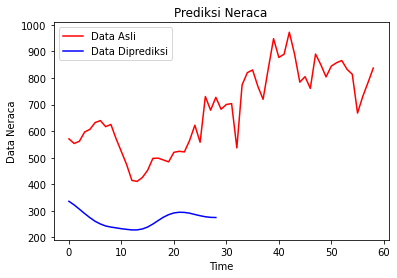

In [17]:
# Visualising the results
plt.plot(realdata, color = 'red', label = 'Data Asli')
plt.plot(prediksi, color = 'blue', label = 'Data Diprediksi')
plt.title('Prediksi Neraca')
plt.xlabel('Time')
plt.ylabel('Data Neraca')
plt.legend()
plt.show()

In [21]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((prediction- y_test)**2)))
rmse

NameError: name 'prediction' is not defined

In [22]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Neraca'])
plt.plot(valid[['Neraca', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

NameError: name 'data' is not defined

In [ ]:
valid

In [ ]:
datanew = pd.read_csv('Test.csv',decimal=',')

new_df = datanew.filter(['Neraca'])

last_60_days = new_df[-30:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
#Get the quote
data2 = pd.read_csv('Test.csv')
print(data2['Neraca'])